In [10]:
import tensorflow as tf
import numpy
import matplotlib.pyplot as plt

In [2]:
lr = 0.01
epochs = 1000
display_step = 50

In [3]:
# Training Data
train_X = numpy.asarray([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
                         7.042,10.791,5.313,7.997,5.654,9.27,3.1])
train_Y = numpy.asarray([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
                         2.827,3.465,1.65,2.904,2.42,2.94,1.3])

n_samples = train_X.shape[0]
print("Shape of X: {} \nShape of Y: {} \nLength of X: {}" .format(train_X.shape, train_Y.shape, len(train_X)))

Shape of X: (17,) 
Shape of Y: (17,) 
Length of X: 17


In [4]:
# tf graph input
X = tf.placeholder("float")
Y = tf.placeholder("float")

# set model weights
W = tf.Variable(numpy.random.randn(), name = "weight")
b = tf.Variable(numpy.random.randn(), name = "bias")

In [5]:
# linear model
# y= mx + b

mx = tf.multiply(X,W)
pred = tf.add(mx, b)

In [6]:
# mean squared error
cost = tf.reduce_sum(tf.pow(pred-Y, 2))/(2*n_samples)

# gradient descent
optim = tf.train.GradientDescentOptimizer(lr).minimize(cost)

In [7]:
# initialize variables
init = tf.global_variables_initializer()
init

<tf.Operation 'init' type=NoOp>

Inital W= -0.46904438734054565
Inital b= -0.685786783695221

Epoch= 50 Cost= 0.005998384207487106 W= 0.42712709307670593 b=-0.47569674253463745
Epoch= 100 Cost= 0.004905027337372303 W= 0.4165683388710022 b=-0.3997378647327423
Epoch= 150 Cost= 0.003976995125412941 W= 0.40663760900497437 b=-0.32829639315605164
Epoch= 200 Cost= 0.0031928953249007463 W= 0.3972974121570587 b=-0.26110413670539856
Epoch= 250 Cost= 0.0025339156854897738 W= 0.3885127604007721 b=-0.19790811836719513
Epoch= 300 Cost= 0.0019835522398352623 W= 0.38025060296058655 b=-0.13847054541110992
Epoch= 350 Cost= 0.0015273417811840773 W= 0.37247976660728455 b=-0.08256801217794418
Epoch= 400 Cost= 0.0011525891022756696 W= 0.3651711344718933 b=-0.029990179464221
Epoch= 450 Cost= 0.000848182593472302 W= 0.358297199010849 b=0.019460532814264297
Epoch= 500 Cost= 0.0006043919711373746 W= 0.3518320620059967 b=0.06597016751766205
Epoch= 550 Cost= 0.0004127073916606605 W= 0.34575143456459045 b=0.10971350967884064
Epoch= 600 Cost= 0.00

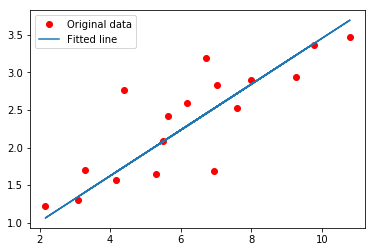

In [8]:
# start training

with tf.Session() as sess:
    sess.run(init)
    print("Inital W= {}" .format(sess.run(W)))
    print("Inital b= {}\n" .format(sess.run(b)))
    for epoch in range(epochs):
        for (x, y) in zip(train_X, train_Y):
            sess.run(optim, feed_dict={X: x, Y: y})
            
        # display
        if (epoch+1) % display_step == 0:
            c = sess.run(cost, feed_dict={X: x, Y: y})
            print("Epoch= {} Cost= {} W= {} b={}" .format(epoch+1, c,sess.run(W),sess.run(b)))

    print("\nOptimization done!\n")
    training_cost = sess.run(cost, feed_dict={X: x, Y: y})
    
    print("Training cost is {}" .format(training_cost))
    print("W= {}" .format(sess.run(W)))
    print("b= {}" .format(sess.run(b)))
    
    
    # graphic display
    plt.plot(train_X, train_Y, 'ro', label='Original data')
    # y = mx+b
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()

### Eager API implementation

In [9]:
# Set Eager API
tf.enable_eager_execution()
tfe = tf.contrib.eager

ValueError: tf.enable_eager_execution must be called at program startup.

This eager API deserves seperate nb -_- If you are seeing this, go to next tut